### Testing the correctness of the implementation

Note that in the paper some details of the algorithms appear to be incorrect. For example, the second pass of the PRIORITY algorithm should not check only nodes with residual degree greater than zero. Also, the greedy algorithm to anonymise the degree vectors needs to account for some special cases that are not discussed in the paper.

In [1]:
import networkx as nx
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import kdegree as kd

Stats before anonymisation:
Num edges = 249
k = 1
Full degree sequence = [18, 16, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 4]

Original graph =


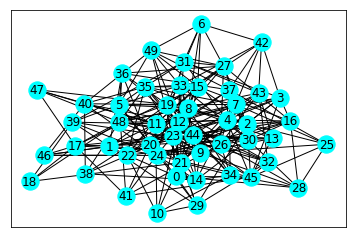

Anonymisation...


Stats before swapping edges to maximise overlap:
Edge overlap = 23.015873015873016%
Num edges = 264
k = 5
Full degree sequence = [18, 18, 18, 18, 18, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6]

Stats after swapping edges to maximise overlap:
Edge overlap = 23.41269841269841%
Num edges = 264
k = 5
Full degree sequence = [18, 18, 18, 18, 18, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6]

Anonymised graph with GREEDY SWAP =


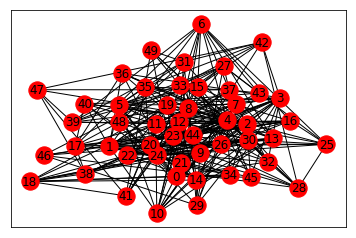

Stats when anonymised with PRIORITY:
Edge overlap = 82.14285714285714%
Num edges = 264
k = 5
Full degree sequence = [18, 18, 18, 18, 18, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6]

Anonymised graph with PRIORITY =


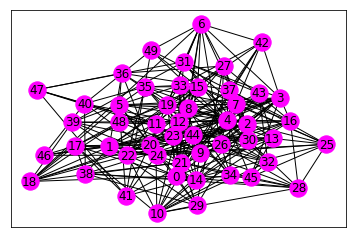

In [2]:
G = nx.erdos_renyi_graph(50,0.2)

print("Stats before anonymisation:")
print("Num edges = " + str(nx.number_of_edges(G)))
degree_sequence = kd.get_degree_sequence(G)
degree_sequence.sort(reverse=True)
min_k = 1e8
for d in degree_sequence:
    d_k = degree_sequence.count(d)
    min_k = d_k if d_k < min_k else min_k
print("k = " + str(min_k))
print("Full degree sequence =",degree_sequence)

print("\nOriginal graph =")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=True,node_color='cyan')
plt.show()

print("Anonymisation...\n\n")
k=5

Ga = kd.graph_anonymiser(G,k,with_priority=False)

print("Stats before swapping edges to maximise overlap:")
H = nx.intersection(Ga,G)
print("Edge overlap = " + str(100*nx.number_of_edges(H)/nx.number_of_edges(G))+"%")
print("Num edges = " + str(nx.number_of_edges(Ga)))
degree_sequence = kd.get_degree_sequence(Ga)
min_k = 1e8
for d in degree_sequence:
    d_k = degree_sequence.count(d)
    min_k = d_k if d_k < min_k else min_k
print("k = " + str(min_k))
print("Full degree sequence =",degree_sequence)

Gaa = kd.greedy_swap(Ga,G.edges())

print("\nStats after swapping edges to maximise overlap:")
H = nx.intersection(Gaa,G)
print("Edge overlap = " + str(100*nx.number_of_edges(H)/nx.number_of_edges(G))+"%")
print("Num edges = " + str(nx.number_of_edges(Gaa)))

degree_sequence = kd.get_degree_sequence(Gaa)
min_k = 1e8
for d in degree_sequence:
    d_k = degree_sequence.count(d)
    min_k = d_k if d_k < min_k else min_k
print("k = " + str(min_k))
print("Full degree sequence =",degree_sequence)

print("\nAnonymised graph with GREEDY SWAP =")
nx.draw_networkx(Gaa,pos=pos,with_labels=True,node_color='red')
plt.show()

Gap = kd.graph_anonymiser(G,k,with_priority=True)

print("Stats when anonymised with PRIORITY:")
H = nx.intersection(Gap,G)
print("Edge overlap = " + str(100*nx.number_of_edges(H)/nx.number_of_edges(G))+"%")
print("Num edges = " + str(nx.number_of_edges(Gap)))

degree_sequence = kd.get_degree_sequence(Gap)
min_k = 1e8
for d in degree_sequence:
    d_k = degree_sequence.count(d)
    min_k = d_k if d_k < min_k else min_k
print("k = " + str(min_k))
print("Full degree sequence =",degree_sequence)

print("\nAnonymised graph with PRIORITY =")
nx.draw_networkx(Gap,pos=pos,with_labels=True,node_color='magenta')
plt.show()

Check the correctness of the degree anonymiser

In [3]:
k = 10
i = 1
while True:
    G = nx.erdos_renyi_graph(30,0.2)
    degree_sequence = kd.get_degree_sequence(G)
    degree_sequence.sort(reverse=True)
    ad1 = kd.greedy_degree_anonymiser(degree_sequence,k)
    ad2 = kd.dp_degree_anonymiser(degree_sequence,k)
    ad3 = kd.dp_degree_anonymiser(degree_sequence,k,deletions=True)
    i = i+1
    if ad2 != ad3:
        print(i)
        print(degree_sequence,np.sum(np.abs(np.array(degree_sequence)-np.array(degree_sequence))))
        print(ad1,np.sum(np.abs(np.array(degree_sequence)-np.array(ad1))))
        print(ad2,np.sum(np.abs(np.array(degree_sequence)-np.array(ad2))))
        print(ad3,np.sum(np.abs(np.array(degree_sequence)-np.array(ad3))))
        break

TypeError: dp_degree_anonymiser() got an unexpected keyword argument 'deletions'